In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, roc_curve, auc, confusion_matrix, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/home/ziyad/Desktop/Datasets/Tree Survival Prediction/Tree_Data.csv')

In [3]:
df.head(20)

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,NaN
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,NaN
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,NaN,NaN
5,18,1,C,Prunus serotina,0.106,Med,2016,Acer rubrum,1332,Non-Sterile,...,35.29,NaN,0.30,10.80,13.79,7,24.5,1.0,NaN,NaN
6,25,1,A,Quercus alba,0.108,Med,2016,Populus grandidentata,891,Non-Sterile,...,24.00,20.00,5.11,18.82,22.51,7,24.5,0.0,X,NaN
7,40,1,A,Quercus rubra,0.108,Med,2017,Sterile,1595,Sterile,...,4.00,0.00,3.43,25.22,14.81,7,24.5,0.0,X,NaN
8,26,1,A,Quercus rubra,0.108,Med,2016,Acer saccharum,1323,Non-Sterile,...,28.74,36.18,3.83,26.65,14.65,33,115.5,0.0,NaN,X
9,41,1,A,Acer saccharum,0.108,Med,2016,Populus grandidentata,394,Non-Sterile,...,14.16,NaN,-0.05,13.30,12.16,7,24.5,1.0,NaN,NaN


In [4]:
df.isnull().sum()


No                0
Plot              0
Subplot           0
Species           0
Light_ISF         0
Light_Cat         0
Core              0
Soil              0
Adult             0
Sterile           0
Conspecific       0
Myco              0
SoilMyco          0
PlantDate         0
AMF               0
EMF            1500
Phenolics         0
Lignin            0
NSC               0
Census            0
Time              0
Event             1
Harvest        2079
Alive          2292
dtype: int64

In [5]:
column_with_missing_value = 'Event'

# Find the index with the missing value
missing_index = df[df[column_with_missing_value].isnull()].index[0]

# Print values of other features for the same index
print("Values of other features at index", missing_index)
print(df.iloc[missing_index, :])

Values of other features at index 2781
No                     7771
Plot                     18
Subplot                   D
Species        Quercus alba
Light_ISF             0.161
Light_Cat              High
Core                   2017
Soil                Sterile
Adult                  1297
Sterile             Sterile
Conspecific      Sterilized
Myco                    EMF
SoilMyco            Sterile
PlantDate           5/17/18
AMF                   16.99
EMF                   22.51
Phenolics              4.28
Lignin                19.38
NSC                   21.36
Census                   33
Time                  115.5
Event                   NaN
Harvest                 NaN
Alive                   NaN
Name: 2781, dtype: object


In [6]:
df.dropna(subset=['Event'], inplace=True)
df.shape

(2782, 24)

In [7]:
index_to_print = 2781

# Print all feature values at the specified index
print("Feature values at index", index_to_print)
print(df.iloc[index_to_print, :])

Feature values at index 2781
No                              7401
Plot                              18
Subplot                            A
Species              Prunus serotina
Light_ISF                      0.141
Light_Cat                       High
Core                            2016
Soil           Populus grandidentata
Adult                            118
Sterile                  Non-Sterile
Conspecific           Heterospecific
Myco                             AMF
SoilMyco                         EMF
PlantDate                     6/7/18
AMF                            60.46
EMF                              NaN
Phenolics                        1.0
Lignin                          9.04
NSC                            11.82
Census                            16
Time                            56.0
Event                            1.0
Harvest                          NaN
Alive                            NaN
Name: 2782, dtype: object


Data Cleaning and Feature Engineering

In [8]:
df = df.drop(['Plot', 'Subplot', 'Time', 'Harvest', 'Alive', 'PlantDate', 'Census'], axis=1)

In [9]:
df.isnull().sum()


No                0
Species           0
Light_ISF         0
Light_Cat         0
Core              0
Soil              0
Adult             0
Sterile           0
Conspecific       0
Myco              0
SoilMyco          0
AMF               0
EMF            1500
Phenolics         0
Lignin            0
NSC               0
Event             0
dtype: int64

Handle Missing Data

In [10]:
df['EMF'].fillna(df['EMF'].mean(), inplace=True)

In [11]:
df.isnull().sum()


No             0
Species        0
Light_ISF      0
Light_Cat      0
Core           0
Soil           0
Adult          0
Sterile        0
Conspecific    0
Myco           0
SoilMyco       0
AMF            0
EMF            0
Phenolics      0
Lignin         0
NSC            0
Event          0
dtype: int64

In [12]:
df.head(20)

,No,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,Conspecific,Myco,SoilMyco,AMF,EMF,Phenolics,Lignin,NSC,Event
0,126,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,Heterospecific,AMF,AMF,22.00,26.479844,-0.56,13.86,12.15,1.0
1,11,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,Heterospecific,EMF,EMF,15.82,31.070000,5.19,20.52,19.29,0.0
2,12,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,Heterospecific,EMF,AMF,24.45,28.190000,3.36,24.74,15.01,1.0
3,2823,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,Heterospecific,AMF,AMF,22.23,26.479844,-0.71,14.29,12.36,1.0
4,5679,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,Heterospecific,AMF,AMF,21.15,26.479844,-0.58,10.85,11.20,1.0
5,18,Prunus serotina,0.106,Med,2016,Acer rubrum,1332,Non-Sterile,Heterospecific,AMF,AMF,35.29,26.479844,0.30,10.80,13.79,1.0
6,25,Quercus alba,0.108,Med,2016,Populus grandidentata,891,Non-Sterile,Heterospecific,EMF,EMF,24.00,20.000000,5.11,18.82,22.51,0.0
7,40,Quercus rubra,0.108,Med,2017,Sterile,1595,Sterile,Sterilized,EMF,Sterile,4.00,0.000000,3.43,25.22,14.81,0.0
8,26,Quercus rubra,0.108,Med,2016,Acer saccharum,1323,Non-Sterile,Heterospecific,EMF,AMF,28.74,36.180000,3.83,26.65,14.65,0.0
9,41,Acer saccharum,0.108,Med,2016,Populus grandidentata,394,Non-Sterile,Heterospecific,AMF,EMF,14.16,26.479844,-0.05,13.30,12.16,1.0


In [13]:
lst=["Species","Light_Cat","Soil","Sterile","Conspecific","Myco","SoilMyco"]
le=LabelEncoder()
for i in lst:
    df[i]=le.fit_transform(df[i])

# Convert 'Adult' to string and then encode
df['Adult'] = df['Adult'].astype(str)
df['Adult'] = le.fit_transform(df['Adult'])

In [14]:
df.head(20)

,No,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,Conspecific,Myco,SoilMyco,AMF,EMF,Phenolics,Lignin,NSC,Event
0,126,0,0.106,2,2017,3,34,0,1,0,0,22.00,26.479844,-0.56,13.86,12.15,1.0
1,11,2,0.106,2,2017,5,30,0,1,1,1,15.82,31.070000,5.19,20.52,19.29,0.0
2,12,3,0.106,2,2017,3,35,0,1,1,0,24.45,28.190000,3.36,24.74,15.01,1.0
3,2823,0,0.080,2,2016,3,35,0,1,0,0,22.23,26.479844,-0.71,14.29,12.36,1.0
4,5679,0,0.060,1,2017,3,26,0,1,0,0,21.15,26.479844,-0.58,10.85,11.20,1.0
5,18,1,0.106,2,2016,0,9,0,1,0,0,35.29,26.479844,0.30,10.80,13.79,1.0
6,25,2,0.108,2,2016,2,27,0,1,1,1,24.00,20.000000,5.11,18.82,22.51,0.0
7,40,3,0.108,2,2017,6,15,1,2,1,2,4.00,0.000000,3.43,25.22,14.81,0.0
8,26,3,0.108,2,2016,1,6,0,1,1,0,28.74,36.180000,3.83,26.65,14.65,0.0
9,41,0,0.108,2,2016,2,22,0,1,0,1,14.16,26.479844,-0.05,13.30,12.16,1.0


In [15]:
df.any().isnull()

No             False
Species        False
Light_ISF      False
Light_Cat      False
Core           False
Soil           False
Adult          False
Sterile        False
Conspecific    False
Myco           False
SoilMyco       False
AMF            False
EMF            False
Phenolics      False
Lignin         False
NSC            False
Event          False
dtype: bool

In [16]:
y = df['Event']
X = df.drop('Event', axis=1)

In [17]:
params = {
    "max_depth": range(1, 9),
    "min_samples_split": [5, 7, 9, 12, 15],
    "min_samples_leaf": [5, 7, 9, 10, 12]
}

s_kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

estimator = RandomForestClassifier(random_state=42)
scoring = make_scorer(f1_score)

grid_search = GridSearchCV(
    estimator=estimator, 
    param_grid=params, 
    scoring=scoring, 
    cv=s_kfold, 
    n_jobs=-1
)

search_results = grid_search.fit(X, y)

best_params = search_results.best_params_
best_score = search_results.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

Best parameters: {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 5}
Best score: 0.8449382004721941


In [18]:
fi = pd.Series(search_results.best_estimator_.feature_importances_, index = X.columns)
fi

No             0.034046
Species        0.107854
Light_ISF      0.019823
Light_Cat      0.003075
Core           0.002159
Soil           0.011552
Adult          0.011630
Sterile        0.006519
Conspecific    0.009708
Myco           0.174380
SoilMyco       0.007194
AMF            0.121243
EMF            0.052497
Phenolics      0.219098
Lignin         0.144470
NSC            0.074754
dtype: float64

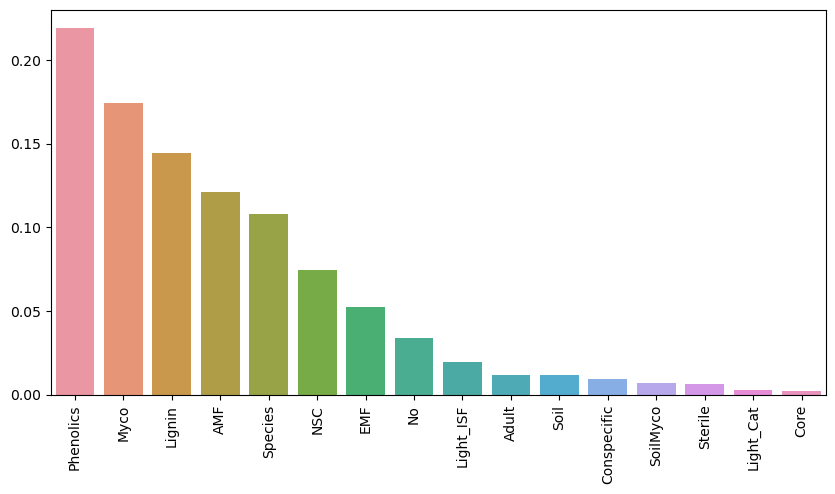

In [19]:
plt.figure(figsize=(10,5))

# Sort the feature importance values in descending order
sorted_fi = fi.sort_values(ascending=False)

# Create a bar plot
ax = sns.barplot(x=sorted_fi.index, y=sorted_fi)

# Rotate x-axis labels for better readability
ax.tick_params(rotation=90, axis='x')

# Show the plot
plt.show()

In [20]:
important_features = fi[fi >= 0.04 ].index.to_list()
important_features

['Species', 'Myco', 'AMF', 'EMF', 'Phenolics', 'Lignin', 'NSC']

In [21]:
reduced_data = df.loc[:,['Species', 'Myco', 'AMF', 'EMF', 'Phenolics', 'Lignin', 'NSC', 'Event']]
df_reduced = reduced_data.copy()

In [22]:
df_reduced.head(20)

,Species,Myco,AMF,EMF,Phenolics,Lignin,NSC,Event
0,0,0,22.00,26.479844,-0.56,13.86,12.15,1.0
1,2,1,15.82,31.070000,5.19,20.52,19.29,0.0
2,3,1,24.45,28.190000,3.36,24.74,15.01,1.0
3,0,0,22.23,26.479844,-0.71,14.29,12.36,1.0
4,0,0,21.15,26.479844,-0.58,10.85,11.20,1.0
5,1,0,35.29,26.479844,0.30,10.80,13.79,1.0
6,2,1,24.00,20.000000,5.11,18.82,22.51,0.0
7,3,1,4.00,0.000000,3.43,25.22,14.81,0.0
8,3,1,28.74,36.180000,3.83,26.65,14.65,0.0
9,0,0,14.16,26.479844,-0.05,13.30,12.16,1.0


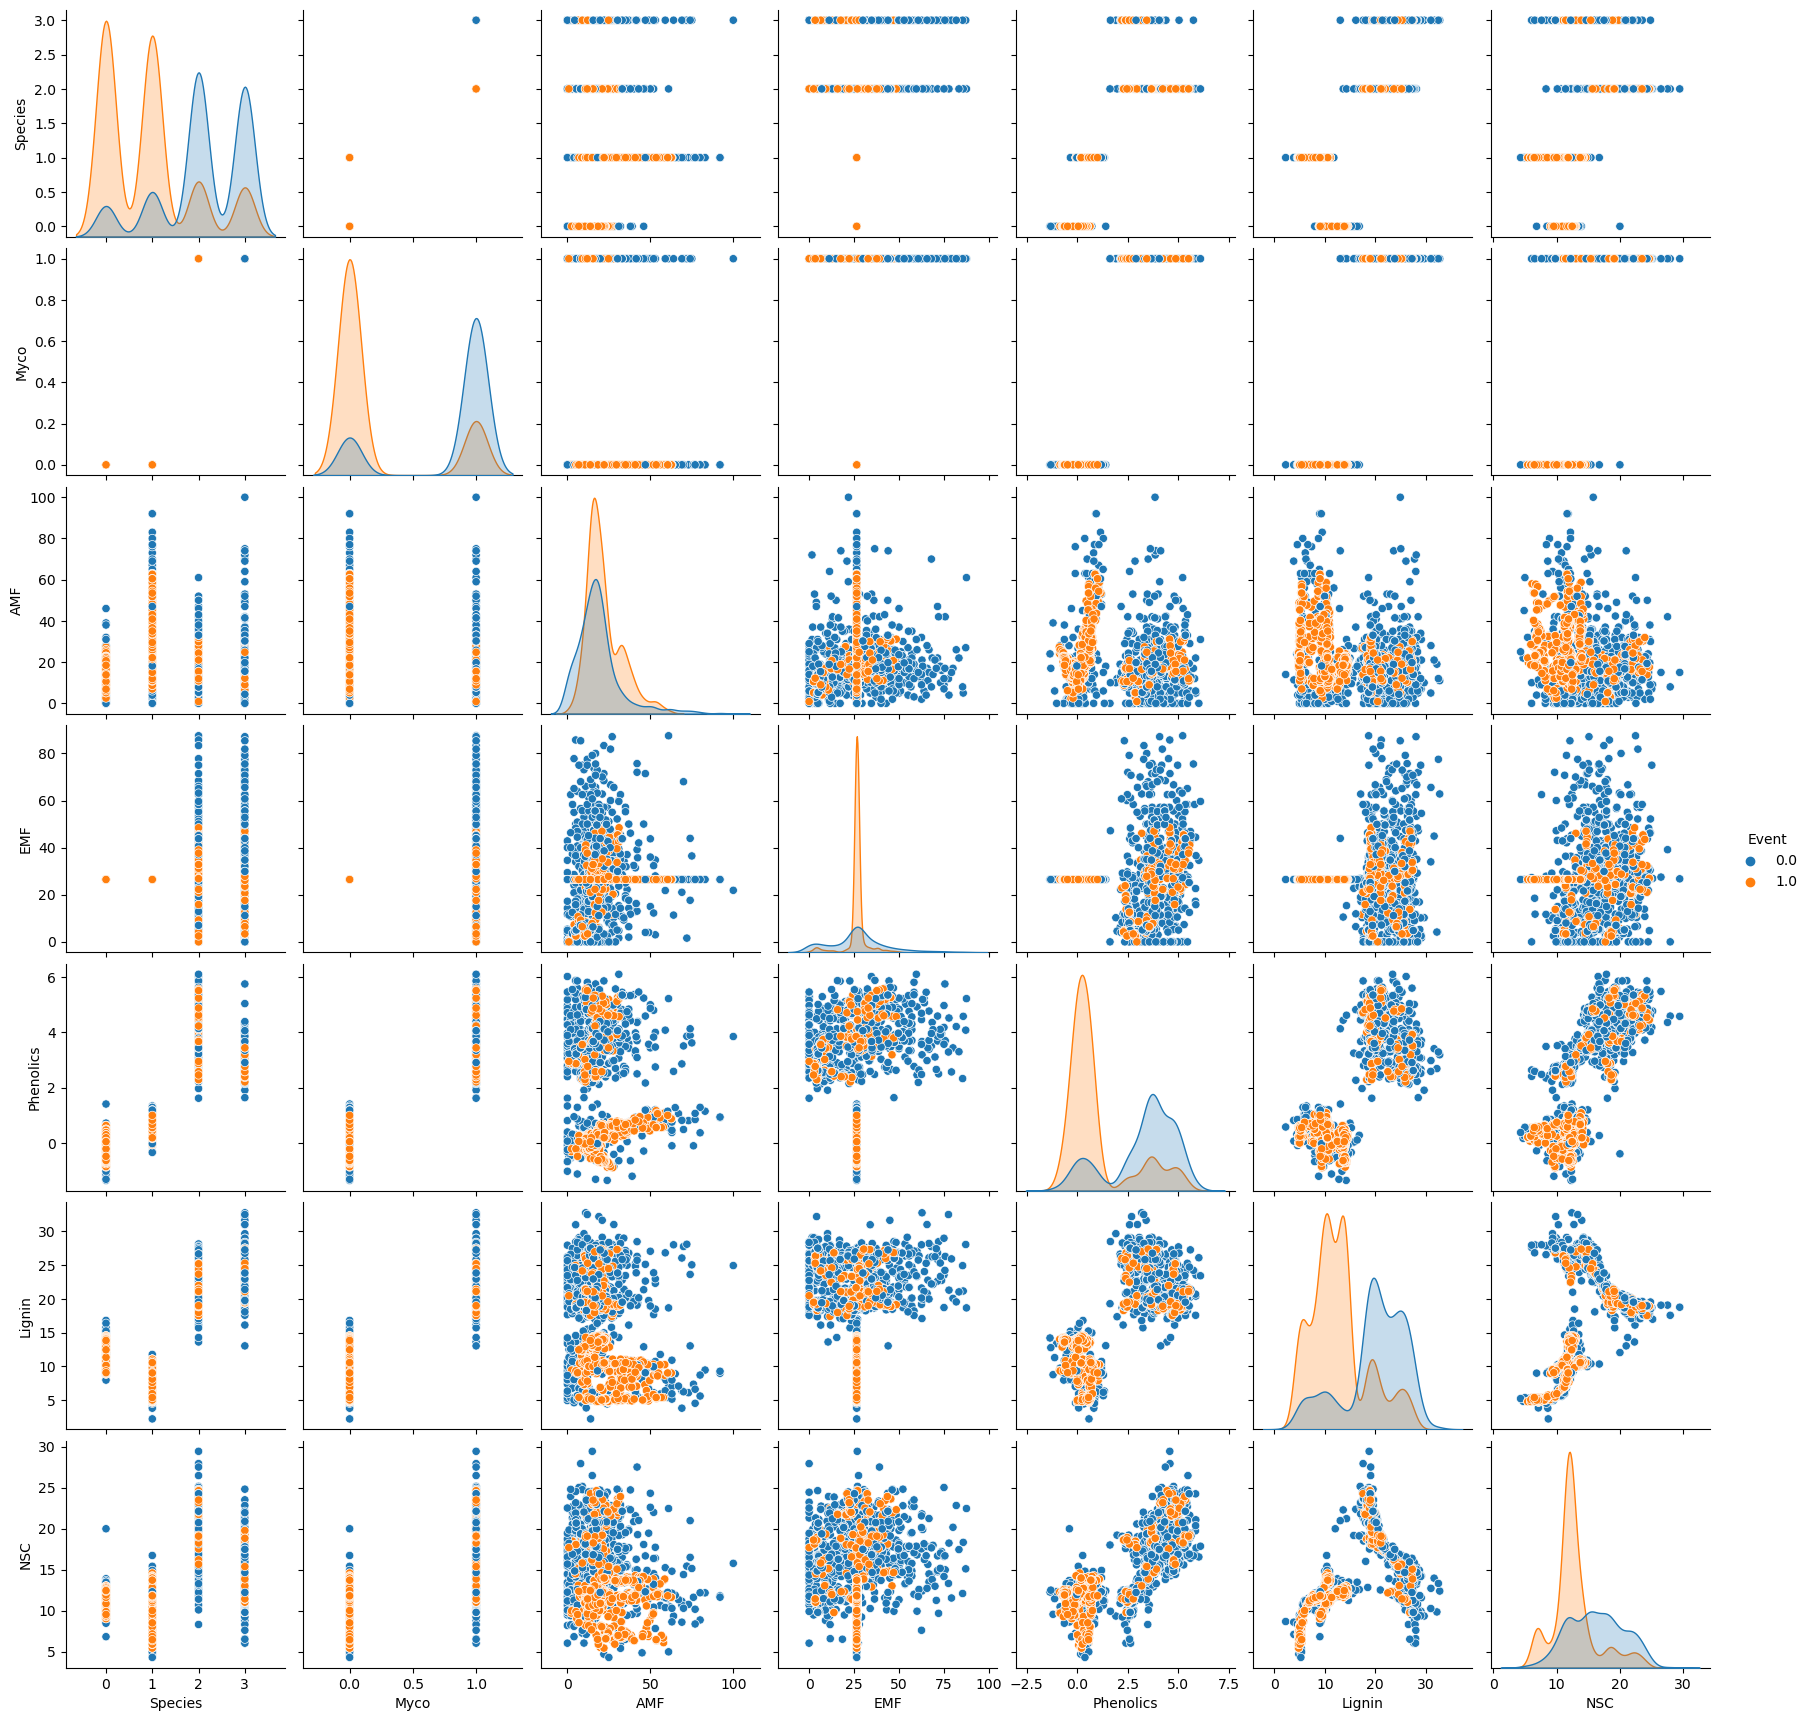

In [23]:
sns.pairplot(reduced_data, hue='Event', diag_kind='kde');


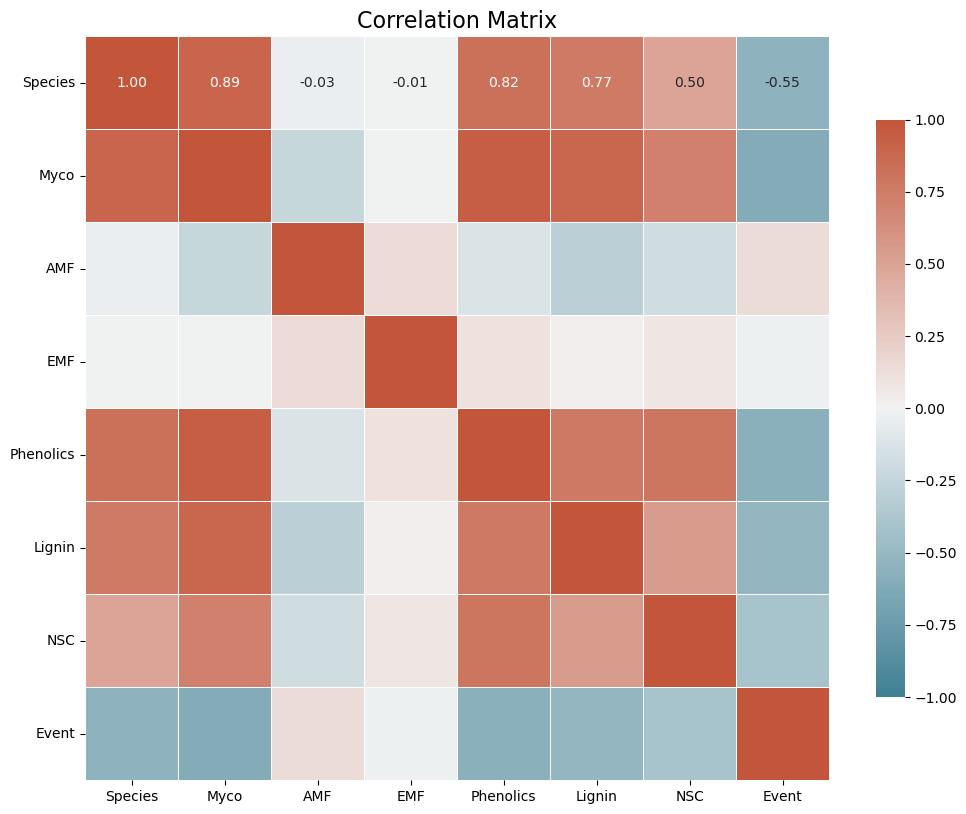

In [40]:
correlation_matrix = reduced_data.corr()

# Set up a diverging color map
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create a larger figure
plt.figure(figsize=(12, 10))

# Plot the enhanced heatmap with actual feature names
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.75}, xticklabels=reduced_data.columns, yticklabels=reduced_data.columns, annot_kws={"size": 10})

# Add a title
plt.title('Correlation Matrix', fontsize=16)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Show the plot
plt.show()


In [25]:
y = df_reduced['Event']
X = df_reduced.drop('Event', axis=1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression

In [27]:
lr = LogisticRegression(penalty=None)
lr.fit(X_train, y_train); 
y_predict_lr = lr.predict(X_test)
y_lr_pred_prob = lr.predict_proba(X_test)


print('The accuracy for the train ' + str(lr.score(X_train, y_train) * 100) + '%')
print('--------------------------------')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_predict_lr))
print('True Positves: ', confusion_matrix(y_test, y_predict_lr)[0][0])
print('False Positives: ', confusion_matrix(y_test, y_predict_lr)[0][1])
print('False Negatives: ', confusion_matrix(y_test, y_predict_lr)[1][0])
print('True Negatives: ', confusion_matrix(y_test, y_predict_lr)[1][1])

The accuracy for the train 79.73033707865169%
--------------------------------
Confusion Matrix
[[200  34]
 [ 64 259]]
True Positves:  200
False Positives:  34
False Negatives:  64
True Negatives:  259


In [28]:
# Accuracy, Precision, Recall, F1 score

df_logR = pd.DataFrame(classification_report(y_predict_lr,y_test, digits=2,output_dict=True)).T

df_logR['support'] = df_logR.support.apply(int)

df_logR.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

confusion_LR=confusion_matrix(y_test, y_predict_lr)
TP = confusion_LR[1, 1]
TN = confusion_LR[0, 0]
FP = confusion_LR[0, 1]
FN = confusion_LR[1, 0]

specificity_lr = TN / (TN + FP)
print('The Specificity Score is ' + str(specificity_lr))

The Specificity Score is 0.8547008547008547


In [29]:
df_logR = pd.DataFrame(classification_report(y_predict_lr,y_test, digits=2,output_dict=True)).T

df_logR['support'] = df_logR.support.apply(int)

df_logR.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

,precision,recall,f1-score,support
0.0,0.854701,0.757576,0.803213,264
1.0,0.801858,0.883959,0.840909,293
accuracy,0.824057,0.824057,0.824057,0
macro avg,0.828279,0.820767,0.822061,557
weighted avg,0.826904,0.824057,0.823042,557


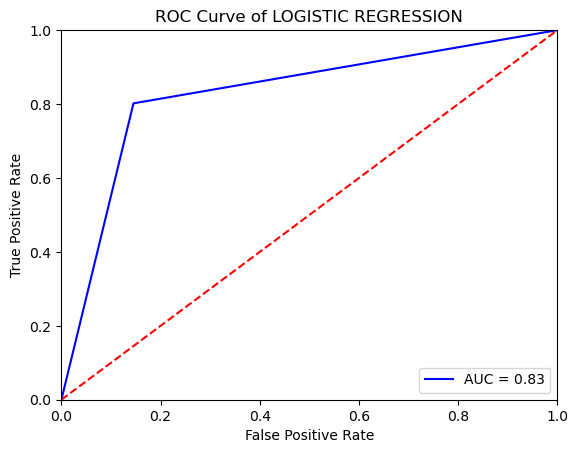

In [30]:
# ROC Curve of Logistic Regression

Y_scores = lr.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_predict_lr)
roc_auc = auc(fpr, tpr)

plt.title('Logistic RegressionClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of LOGISTIC REGRESSION')
plt.show()

Random Forest

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train); 
y_predict_rf = rf.predict(X_test)
y_rf_pred_prob = rf.predict_proba(X_test)


print('The accuracy for the train ' + str(rf.score(X_train, y_train) * 100) + '%')
print('--------------------------------')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_predict_lr))
print('True Positves: ', confusion_matrix(y_test, y_predict_rf)[0][0])
print('False Positives: ', confusion_matrix(y_test, y_predict_rf)[0][1])
print('False Negatives: ', confusion_matrix(y_test, y_predict_rf)[1][0])
print('True Negatives: ', confusion_matrix(y_test, y_predict_rf)[1][1])

The accuracy for the train 95.50561797752809%
--------------------------------
Confusion Matrix
[[200  34]
 [ 64 259]]
True Positves:  191
False Positives:  43
False Negatives:  40
True Negatives:  283


In [32]:
# Accuracy, Precision, Recall, F1 score

df_RF = pd.DataFrame(classification_report(y_predict_rf,y_test, digits=2,output_dict=True)).T

df_RF['support'] = df_RF.support.apply(int)

df_RF.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

confusion_RF=confusion_matrix(y_test, y_predict_rf)
TP = confusion_RF[1, 1]
TN = confusion_RF[0, 0]
FP = confusion_RF[0, 1]
FN = confusion_RF[1, 0]

specificity_rf = TN / (TN + FP)
print('The Specificity Score is ' + str(specificity_rf))

The Specificity Score is 0.8162393162393162


In [33]:
df_RF = pd.DataFrame(classification_report(y_predict_rf,y_test, digits=2,output_dict=True)).T

df_RF['support'] = df_RF.support.apply(int)

df_RF.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

,precision,recall,f1-score,support
0.0,0.816239,0.826840,0.821505,231
1.0,0.876161,0.868098,0.872111,326
accuracy,0.850987,0.850987,0.850987,0
macro avg,0.846200,0.847469,0.846808,557
weighted avg,0.851310,0.850987,0.851124,557


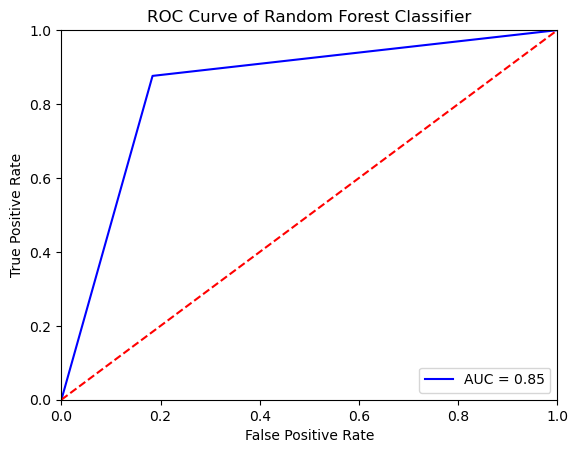

In [34]:
# ROC Curve of Random Forest Classifier

Y_scores = rf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_predict_rf)
roc_auc = auc(fpr, tpr)

plt.title('Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest Classifier')
plt.show()

Support Vector Machine

In [35]:
sv = SVC(probability=True)
sv.fit(X_train, y_train); 
y_predict_sv = sv.predict(X_test)
y_sv_pred_prob = sv.predict_proba(X_test)


print('The accuracy for the train ' + str(sv.score(X_train, y_train) * 100) + '%')
print('--------------------------------')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_predict_sv))
print('True Positves: ', confusion_matrix(y_test, y_predict_sv)[0][0])
print('False Positives: ', confusion_matrix(y_test, y_predict_sv)[0][1])
print('False Negatives: ', confusion_matrix(y_test, y_predict_sv)[1][0])
print('True Negatives: ', confusion_matrix(y_test, y_predict_sv)[1][1])

The accuracy for the train 81.88764044943821%
--------------------------------
Confusion Matrix
[[209  25]
 [ 65 258]]
True Positves:  209
False Positives:  25
False Negatives:  65
True Negatives:  258


In [36]:
# Accuracy, Precision, Recall, F1 score

df_SV = pd.DataFrame(classification_report(y_predict_sv,y_test, digits=2,output_dict=True)).T

df_SV['support'] = df_SV.support.apply(int)

df_SV.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

confusion_SV=confusion_matrix(y_test, y_predict_sv)
TP = confusion_SV[1, 1]
TN = confusion_SV[0, 0]
FP = confusion_SV[0, 1]
FN = confusion_SV[1, 0]

specificity_sv = TN / (TN + FP)
print('The Specificity Score is ' + str(specificity_sv))

The Specificity Score is 0.8931623931623932


In [37]:
df_SV = pd.DataFrame(classification_report(y_predict_sv,y_test, digits=2,output_dict=True)).T

df_SV['support'] = df_SV.support.apply(int)

df_SV.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

,precision,recall,f1-score,support
0.0,0.893162,0.762774,0.822835,274
1.0,0.798762,0.911661,0.851485,283
accuracy,0.838420,0.838420,0.838420,0
macro avg,0.845962,0.837217,0.837160,557
weighted avg,0.845199,0.838420,0.837391,557


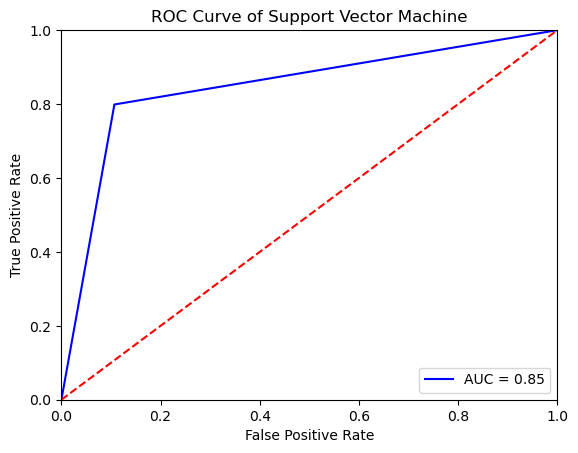

In [38]:
# ROC Curve of Support Vector Machine

Y_scores = sv.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_predict_sv)
roc_auc = auc(fpr, tpr)

plt.title('Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Support Vector Machine')
plt.show()